## Planteo del Problema
El problema que vamos a tratar de resolver es de **predecir** un **heart attack** en un **adulto**.

## Conjunto de datos
Los datos provienen de la página  [Kaggle: Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Obtenemos el nombre de las variables
### Cambiar nombre

heart = pd.read_csv('../data/preprocessed/heart_attack.csv')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Casteamos las variables a categóricas, aquellas que si lo son.
heart = heart.astype({"sex":"category", "cp":"category", 'fbs':"category", 'restecg':"category", 'exng':"category",
                      'slp':"category", 'caa':"category", 'thall':"category", 'output':"category"})
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


### **Glosario** 
----------------

About this dataset.

**Age :** Age of the patient

**Sex :** Sex of the patient

**exang:** exercise induced angina (1 = yes; 0 = no)

**ca:** number of major vessels (0-3)

**cp :** Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
**trtbps :** resting blood pressure (in mm Hg)

**chol :** cholestoral in mg/dl fetched via BMI sensor

**fbs :** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg :** resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
**thalach :** maximum heart rate achieved

**target :**
* 0= less chance of heart attack
* 1= more chance of heart attack

Conclusiones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA


## DIA 3: MODELO DE MACHINE LEARNING

In [5]:
heart_ml = heart.copy()

In [6]:
heart_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categóricas a númericas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('category')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [8]:
#Categóricas
heart_ml.select_dtypes('category')


,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


#### Dataframe final

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [ ]:
num = df.select_dtypes('number').reset_index(drop = True)

Las juntamos todas en el dataframe final

In [ ]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [9]:
x = heart_ml.drop(columns='output')
y = heart_ml['output']

In [10]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


#### Separación train y test

In [11]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) 

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [12]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [24]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.38461538, 0.        , 0.91358025, 0.91358025, 0.91358025,
       0.91358025, 0.91358025, 0.38461538, 0.91358025, 0.38461538,
       0.38461538, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.91358025, 0.91358025, 0.        , 0.83333333])

In [26]:
# Evaluación
from sklearn.metrics import roc_auc_score
y_pred = ac.predict(test_x)
roc_auc_score(test_y,pred)

0.8490338164251208

### INTERPRETACIÓN

#### Diagrama del árbol

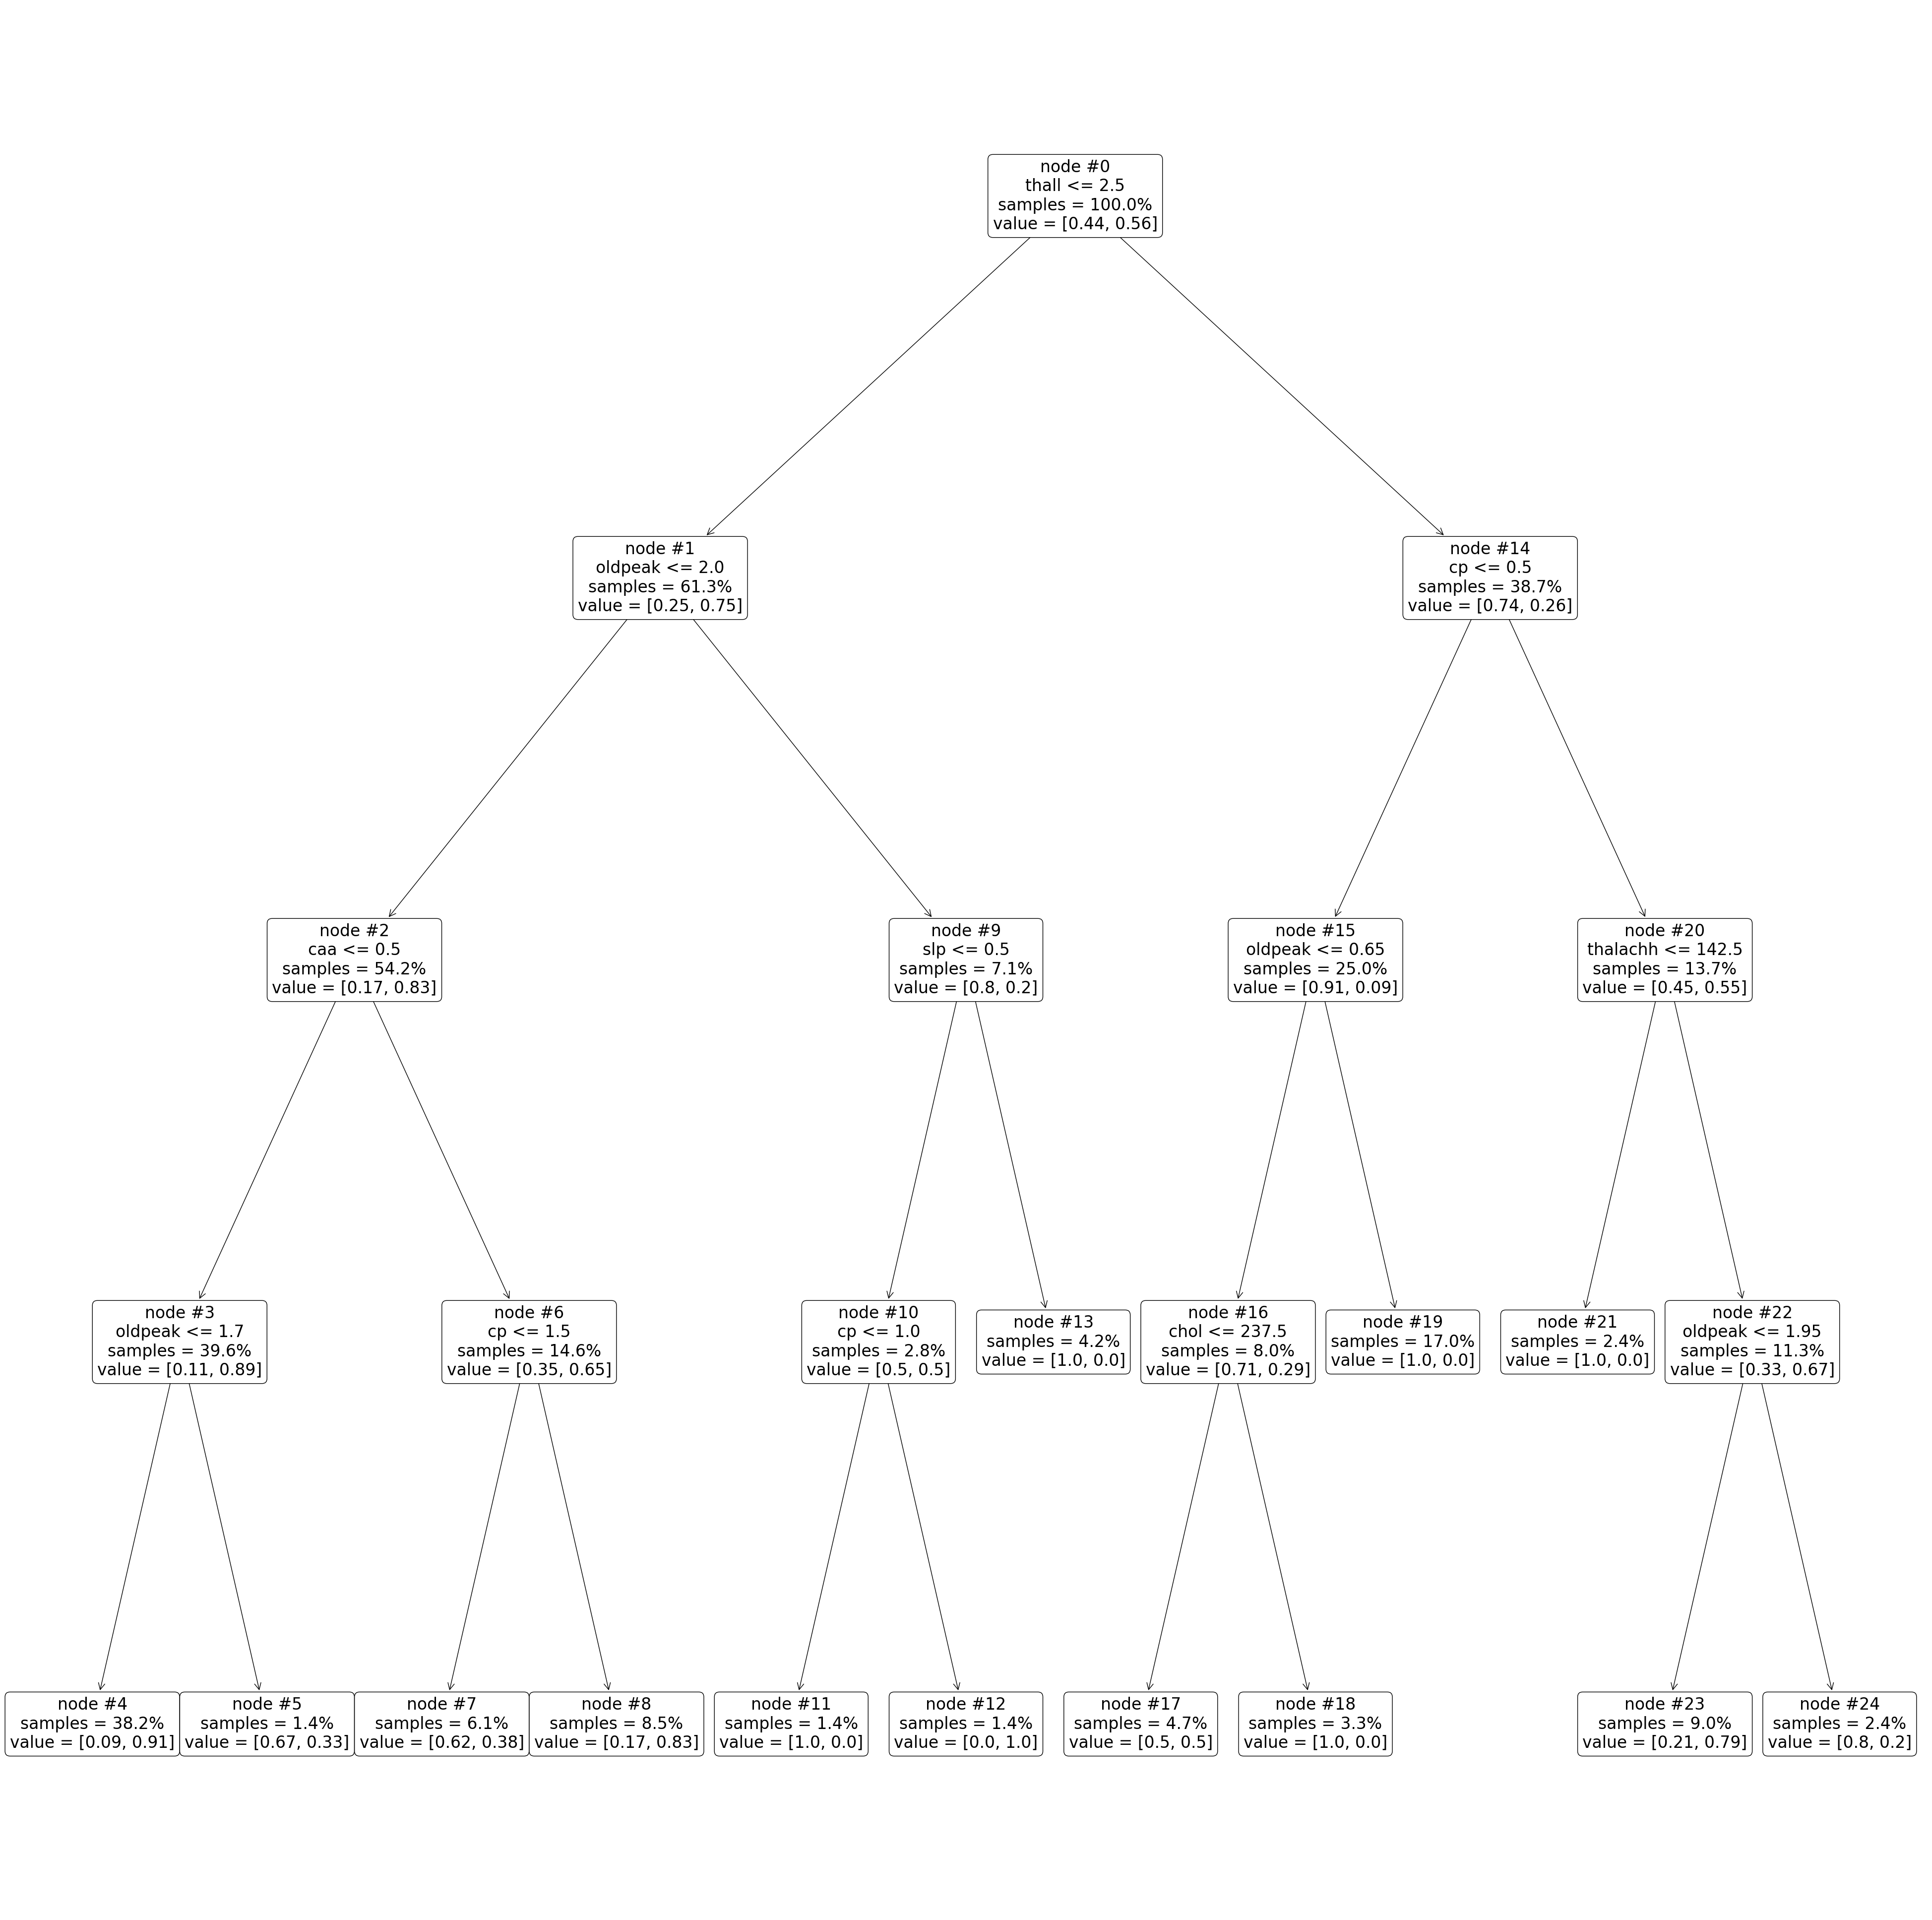

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Importancia de las variables

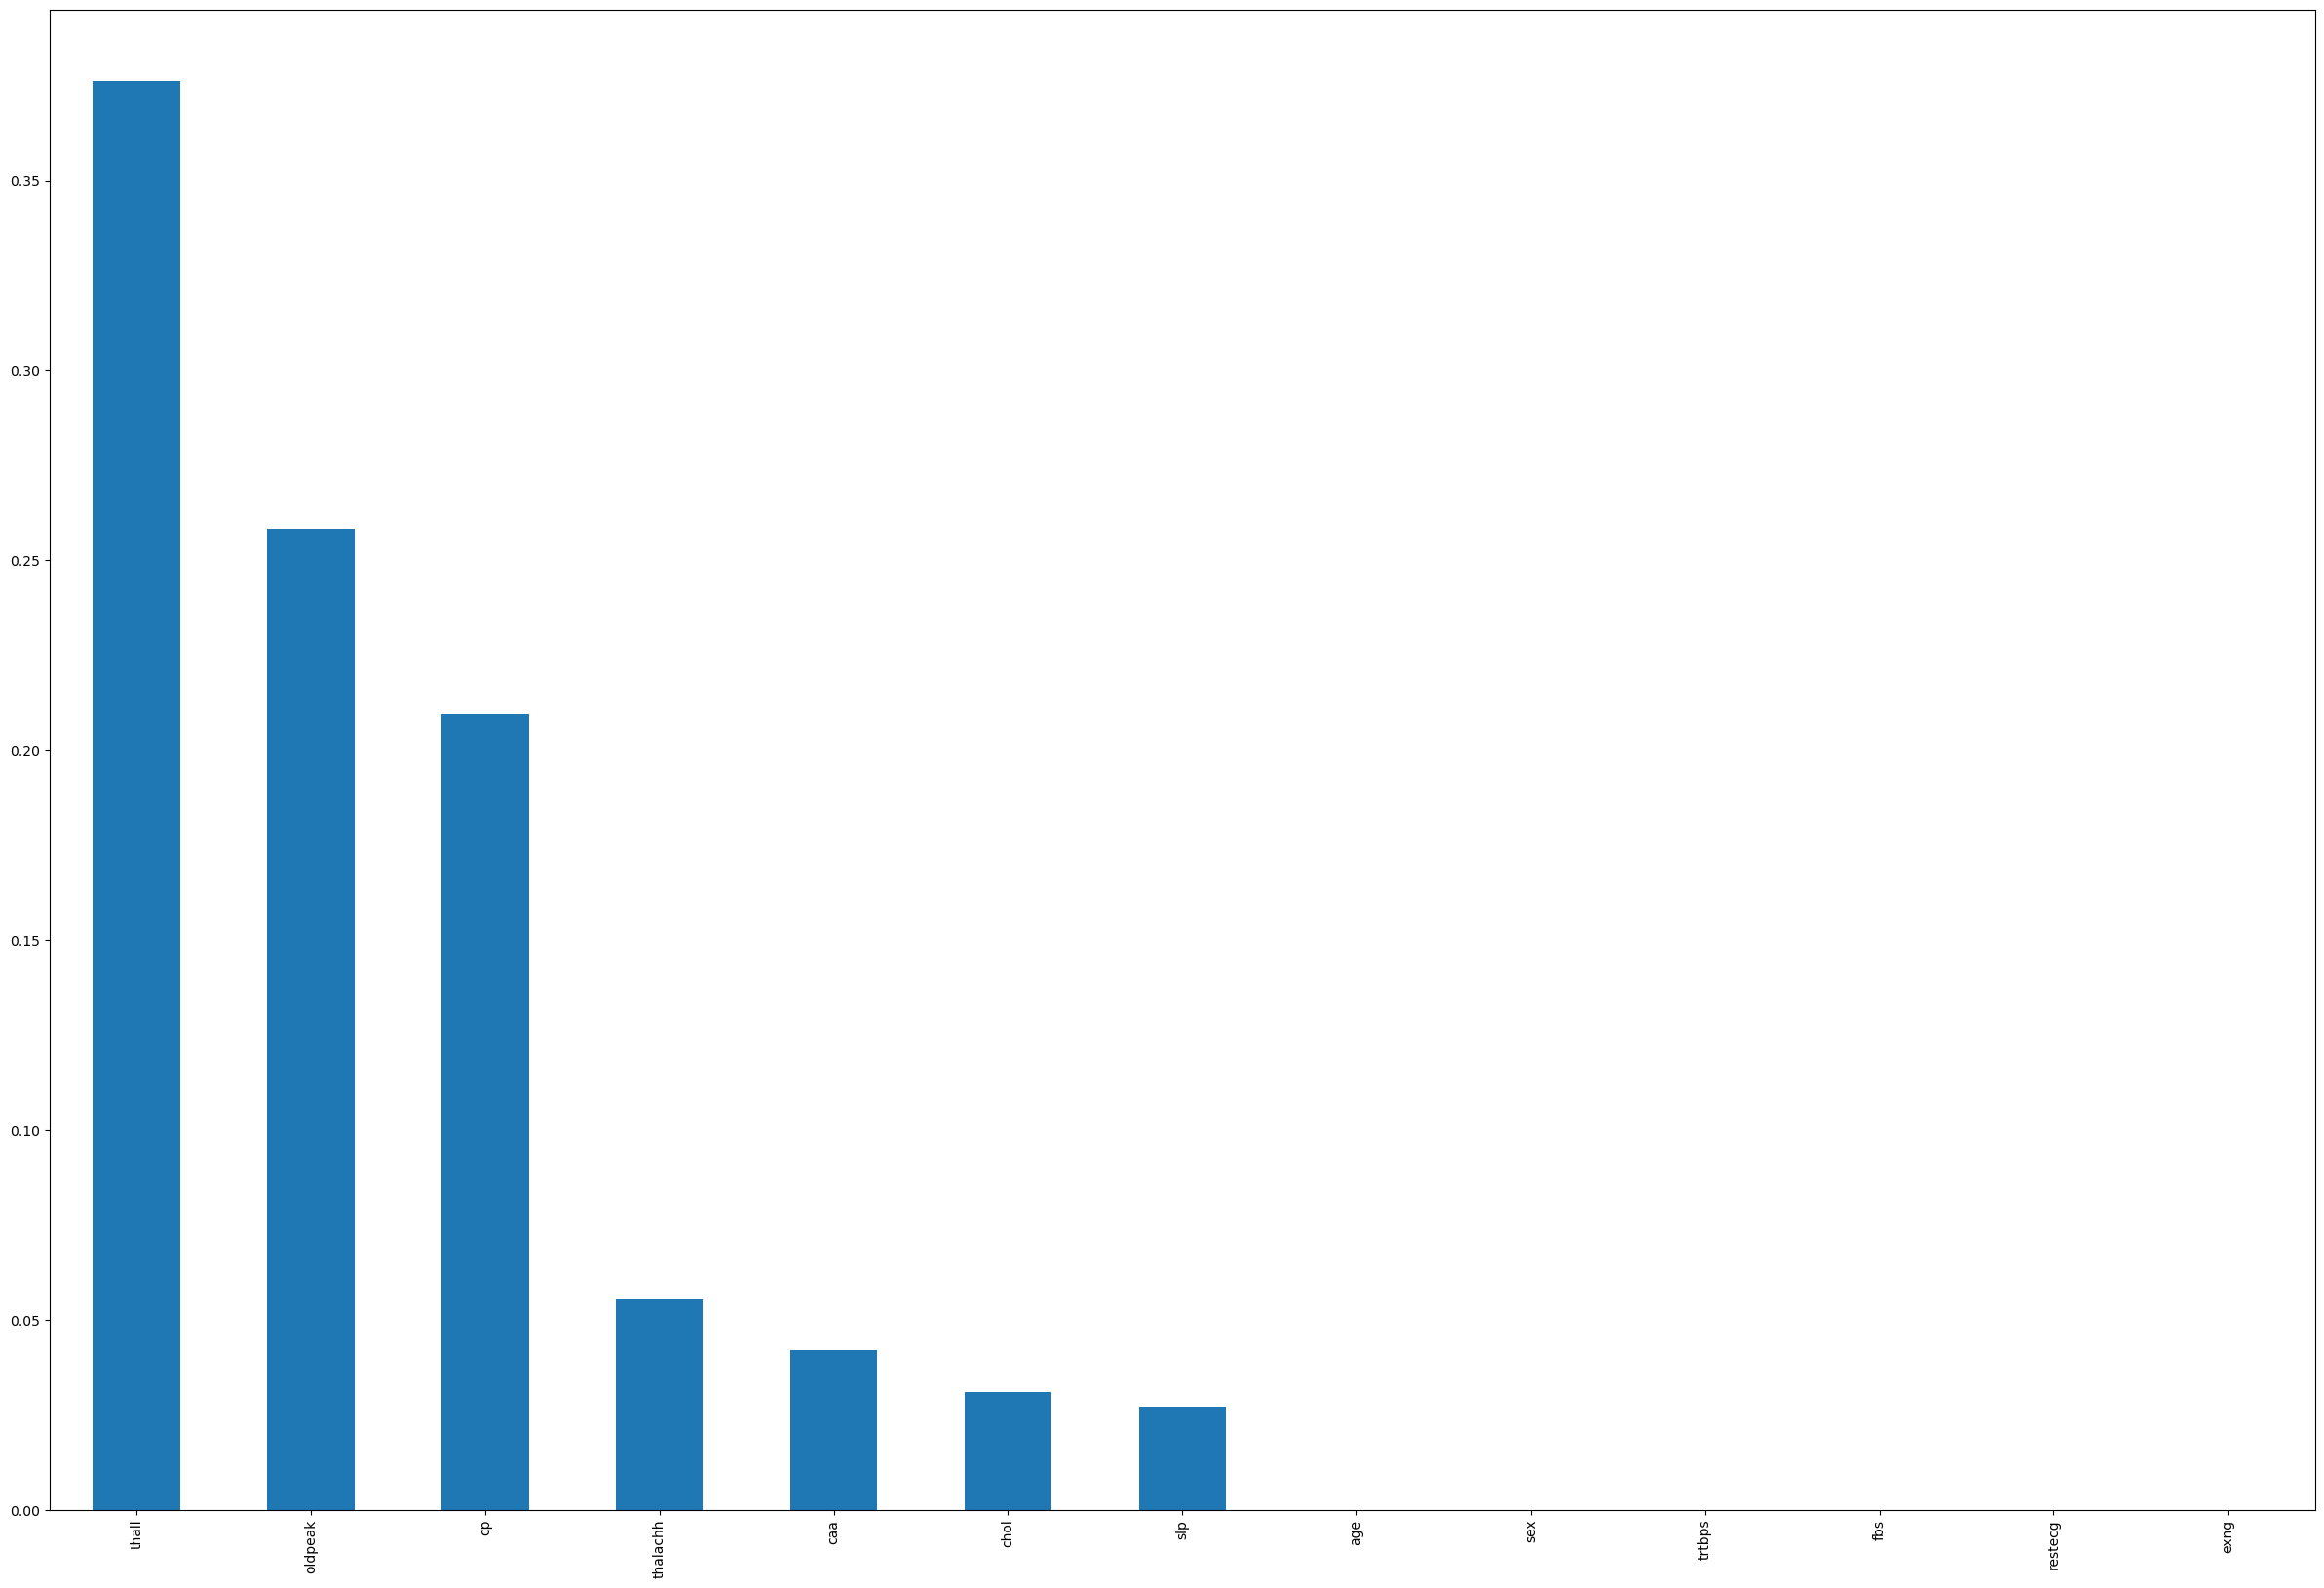

In [14]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### EXPLOTACIÓN

Incoporación del scoring al dataframe principal

In [17]:
heart['scoring_heart_attack'] = ac.predict_proba(heart_ml.drop(columns = 'output'))[:, 1]
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,scoring_heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1.000000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.000000
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.913580
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.913580
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.913580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.000000
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.000000
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.000000
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.000000


Ejemplo de los 10 paciente con mayor probabilidad de sufrir un heart attack

In [20]:
heart.sort_values(by = 'scoring_heart_attack', ascending = False)[0:10]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,scoring_heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1.00000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.00000
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1,1.00000
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1,0.91358
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,0.91358
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1,0.91358
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,0.91358
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1,0.91358
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1,0.91358
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1,0.91358


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


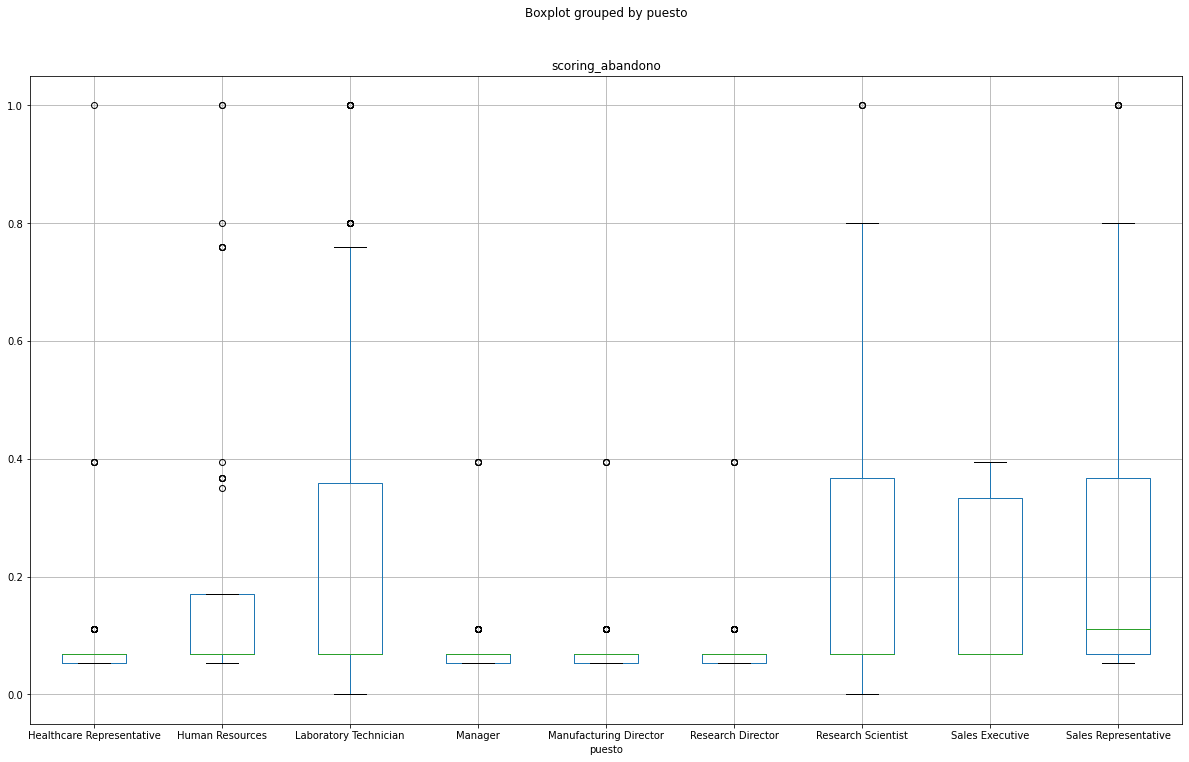

In [ ]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

### GUARDAR EL RESULTADO

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.333333
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.068716
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.758621
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.366667
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.393939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.068716
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.068716
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.053571


In [23]:
heart.to_excel('../data/stage/heart_attack_con_scoring.xlsx') 


In [23]:
heart.to_excel('../data/stage/heart_attack_con_scoring.xlsx') 
